In [1]:
import numpy as np
import fiona as fi
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
data_dir = '../data/input/us/'

In [5]:
ls ../data/input/us

cb_2017_us_state_500k.cpg  cb_2017_us_state_500k.shp.ea.iso.xml*
cb_2017_us_state_500k.dbf  cb_2017_us_state_500k.shp.iso.xml*
cb_2017_us_state_500k.prj  cb_2017_us_state_500k.shp.xml*
cb_2017_us_state_500k.shp  cb_2017_us_state_500k.shx


In [6]:
c = fi.open(data_dir + 'cb_2017_us_state_500k.shp')

In [7]:
for (i, state) in enumerate(c):
    print(i,state['properties']['STUSPS'])

0 WV
1 IL
2 MD
3 ID
4 VT
5 CT
6 NM
7 NJ
8 NE
9 PA
10 GA
11 CO
12 SC
13 OK
14 ND
15 KY
16 GU
17 NV
18 AK
19 AR
20 KS
21 SD
22 VA
23 IA
24 AZ
25 RI
26 NH
27 NC
28 DE
29 CA
30 WI
31 OR
32 WA
33 LA
34 UT
35 OH
36 TX
37 TN
38 MP
39 NY
40 ME
41 AS
42 MI
43 MT
44 IN
45 PR
46 MA
47 DC
48 WY
49 MS
50 FL
51 HI
52 MN
53 AL
54 MO
55 VI


In [25]:
il = c[1]

In [33]:
np.array(il['geometry']['coordinates'][0])

array([-91.512974,  40.181062])

In [9]:
ny = c[39]

In [10]:
ny['properties']

OrderedDict([('STATEFP', '36'),
             ('STATENS', '01779796'),
             ('AFFGEOID', '0400000US36'),
             ('GEOID', '36'),
             ('STUSPS', 'NY'),
             ('NAME', 'New York'),
             ('LSAD', '00'),
             ('ALAND', 122048992746),
             ('AWATER', 19247151848)])

In [11]:
ny.keys()

dict_keys(['type', 'id', 'geometry', 'properties'])

In [12]:
arr = np.array(ny['geometry']['coordinates'][0][0])

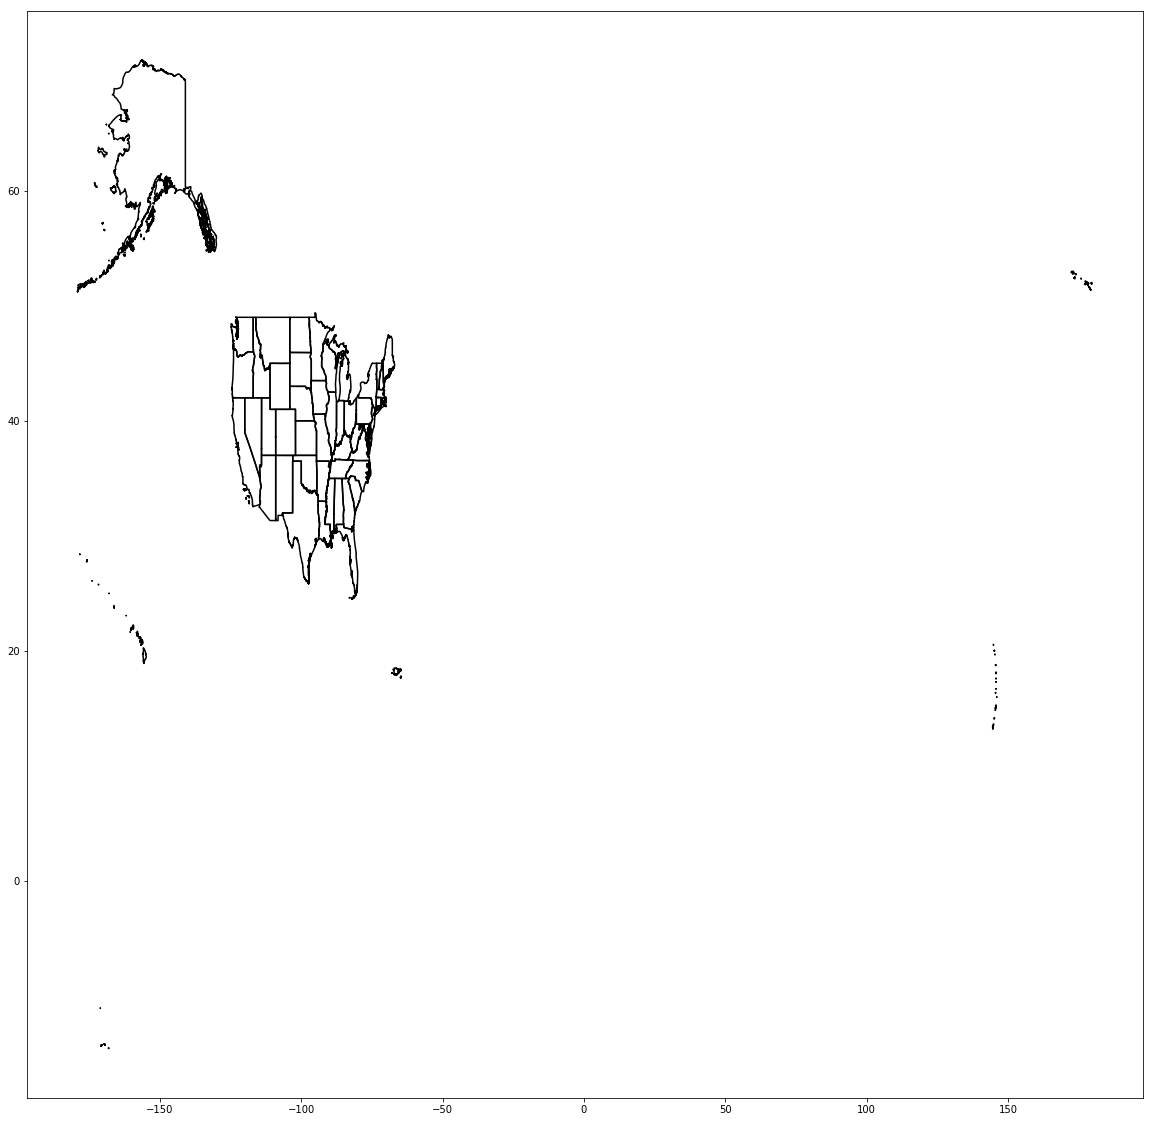

In [18]:
fig, ax = plt.subplots(figsize=(20,20))
for state in c:
    for (i, big_chunk) in enumerate(state['geometry']['coordinates']):
        for (j, chunk) in enumerate(big_chunk):
            if type(big_chunk) != type(chunk):
                arr = np.array(big_chunk)
                ax.plot(arr[:,0], arr[:,1], 'k')
                break
            else:
                arr = np.array(chunk)
                ax.plot(arr[:,0], arr[:,1], 'k')
                break


In [102]:
def find_principal_polygon(state):
    principal_idx = 0
    principal_size = np.array(state['geometry']['coordinates']).size 
    for i, region in enumerate(state['geometry']['coordinates']):
        if np.array(region).size > principal_size:
            principal_idx = i
            principal_size = np.array(region).size
    return principal_idx
    

In [108]:
np.array(c[0]['geometry']['coordinates'][0]).shape

(3893, 2)

In [112]:
len(np.array(c[2]['geometry']['coordinates'][0]).shape)

3

In [104]:
find_principal_polygon(c[0])

0

In [125]:
np.savetxt?

Signature: np.savetxt(fname, X, fmt='%.18e', delimiter=' ', newline='\n', header='', footer='', comments='# ')
Docstring:
Save an array to a text file.

Parameters
----------
fname : filename or file handle
    If the filename ends in ``.gz``, the file is automatically saved in
    compressed gzip format.  `loadtxt` understands gzipped files
    transparently.
X : array_like
    Data to be saved to a text file.
fmt : str or sequence of strs, optional
    A single format (%10.5f), a sequence of formats, or a
    multi-format string, e.g. 'Iteration %d -- %10.5f', in which
    case `delimiter` is ignored. For complex `X`, the legal options
    for `fmt` are:
        a) a single specifier, `fmt='%.4e'`, resulting in numbers formatted
            like `' (%s+%sj)' % (fmt, fmt)`
        b) a full string specifying every real and imaginary part, e.g.
            `' %.4e %+.4ej %.4e %+.4ej %.4e %+.4ej'` for 3 columns
        c) a list of specifiers, one per column - in this case, the real
   

In [126]:
storage_dir = '../data/input/us/states/'
for i, state in enumerate(c):

    if state['geometry']['type'] == 'Polygon':
        data  = np.array(state['geometry']['coordinates'][0])
    else:
        principal = find_principal_polygon(state)
        data = np.array(state['geometry']['coordinates'][principal][0])
    print(i, state['properties']['NAME'], data.shape)
    np.savetxt(storage_dir + f'{state["properties"]["STUSPS"].lower()}.poly', data, fmt='%1.4f')
    
        


0 West Virginia (3893, 2)
1 Illinois (3023, 2)
2 Maryland (6939, 2)
3 Idaho (2974, 2)
4 Vermont (1636, 2)
5 Connecticut (905, 2)
6 New Mexico (707, 2)
7 New Jersey (1588, 2)
8 Nebraska (1989, 2)
9 Pennsylvania (1828, 2)
10 Georgia (3032, 2)
11 Colorado (504, 2)
12 South Carolina (2665, 2)
13 Oklahoma (2649, 2)
14 North Dakota (3217, 2)
15 Kentucky (3104, 2)
16 Guam (670, 2)
17 Nevada (758, 2)
18 Alaska (50730, 2)
19 Arkansas (2493, 2)
20 Kansas (1502, 2)
21 South Dakota (1759, 2)
22 Virginia (5081, 2)
23 Iowa (2658, 2)
24 Arizona (1416, 2)
25 Rhode Island (591, 2)
26 New Hampshire (1801, 2)
27 North Carolina (4393, 2)
28 Delaware (506, 2)
29 California (4380, 2)
30 Wisconsin (4631, 2)
31 Oregon (1964, 2)
32 Washington (4574, 2)
33 Louisiana (4801, 2)
34 Utah (441, 2)
35 Ohio (2959, 2)
36 Texas (11804, 2)
37 Tennessee (2277, 2)
38 Commonwealth of the Northern Mariana Islands (509, 2)
39 New York (3800, 2)
40 Maine (4189, 2)
41 American Samoa (656, 2)
42 Michigan (5644, 2)
43 Montana (23

In [123]:
"ASDF".lower()

'asdf'

In [118]:
for i, state in enumerate(c):
    print(state['geometry']['type'])

Polygon
Polygon
MultiPolygon
Polygon
Polygon
MultiPolygon
Polygon
Polygon
Polygon
Polygon
MultiPolygon
Polygon
MultiPolygon
Polygon
Polygon
MultiPolygon
MultiPolygon
Polygon
MultiPolygon
Polygon
Polygon
Polygon
MultiPolygon
Polygon
Polygon
MultiPolygon
MultiPolygon
MultiPolygon
MultiPolygon
MultiPolygon
MultiPolygon
MultiPolygon
MultiPolygon
MultiPolygon
Polygon
MultiPolygon
MultiPolygon
Polygon
MultiPolygon
MultiPolygon
MultiPolygon
MultiPolygon
MultiPolygon
Polygon
Polygon
MultiPolygon
MultiPolygon
Polygon
Polygon
MultiPolygon
MultiPolygon
MultiPolygon
MultiPolygon
MultiPolygon
Polygon
MultiPolygon


In [14]:
main_chunk = np.array(ny['geometry']['coordinates'][17][0])

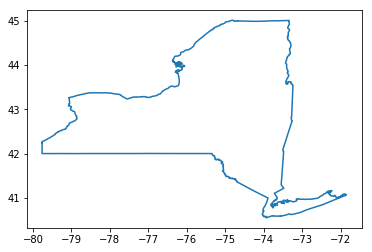

In [15]:
plt.plot(main_chunk[:,0], main_chunk[:,1])

3800

In [113]:
il['geometry']['type']

'Polygon'

In [39]:
ia = c[37]